# Data visualization in Python

## Learning Goals
The goal of this Business Analytics exercise is to teach the most common way of data visualization - plotting.

For training purposes we will use the [Diabetes Classification](https://www.kaggle.com/c/diabetes-classification/overview) dataset, that contains information about patients with and without diabetes. Note that we use a slightly different version of the dataset compared to the original kaggle version.

We will visualize some of the patients' information and try to derive on our own, which information could be interesting for understanding diabetes.

After this exercise for the Python package Matplotlib, you will feel more comfortable:

* Working with Pandas dataframes.
* Creating different plots from dataframes' data
* Interpreting the plots and finding patterns



## Importing modules
For this exercise we will need the ***Matplotlib*** library, that helps us to illustrate graphs, images, lines, etc. The specialty of the Matplotlib package is, that it includes sub-packages. One of the sub-packages is called pyplot which we import as follows:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd # we also need pandas, as we will work with our own dataset
import numpy as np # and numpy, which is a package that is optimized for working with vectors, matrizes, ...

## Basic lines and dots

Now that Matplotlib has been imported, we can access some useful functions. For example, we can use `plot()` to plot a line going through given points. The points are thereby connected through a straight line. The style of the line can be changed as we will see later.

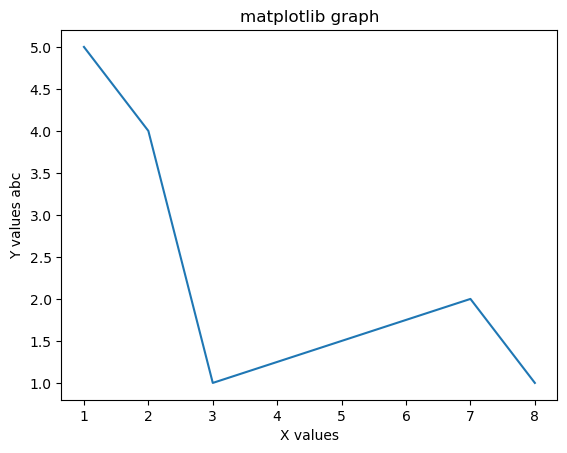

In [5]:
x_values = [1, 2, 3, 7, 8]
y_values = [5, 4, 1, 2, 1] # make sure you have the same number of points in both axis

plt.plot(x_values, y_values) # by default 1st parameter is considered as x-axis, 2nd as y-axis
plt.ylabel('Y values abc') # for a better readability support your graphs with axis labels
plt.xlabel('X values')
plt.title('matplotlib graph') # and title
plt.savefig('test.png')

Note that if you pass only one parameter to the `plot()` function, it will consider your passed values as y-axis. For the x-axis it will use an index array 0..N-1, where N = len(passed parameter):

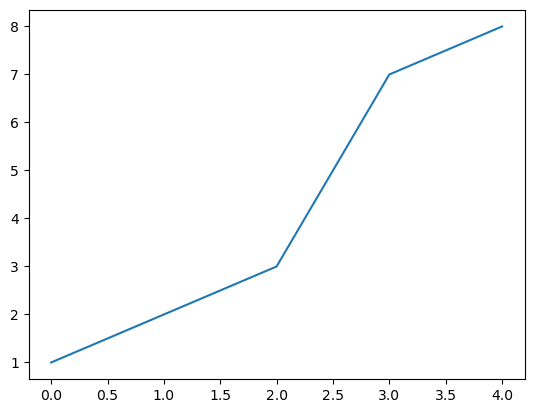

In [7]:
plt.plot(x_values) # these values will be plotted on y-axis
plt.show()

You may wonder, why we need `plt.show()` after each `plt.plot()`. Technically, Jupyter Notebook will output your graphs without specifying `plt.show()`, but if you want to plot two different graphs and don't say explicitly `plt.show()`, they will be drawn on the same canvas. This can sometimes be nice if you have multiple lines/dots that you want to put on top of each other. But sometimes, it also doesn't make sense and you rather keep the plots seperate. On another note, you might notice that some other IDEs don't print graphs without `plt.show()` at all.

Try out the following code and see what will be printed out:

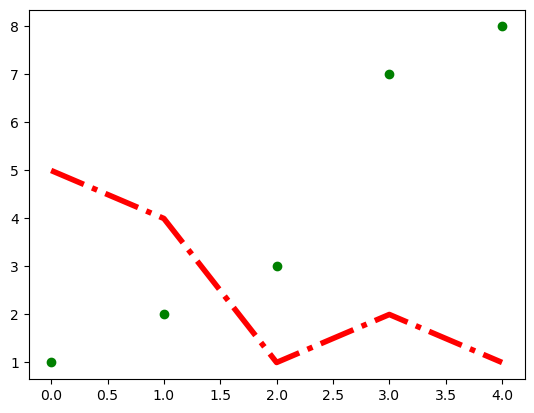

In [11]:
plt.plot(x_values, 'go') # optional parameter 'bo' allows you to respresent data in blue dots, 'go' and 'ro' can make them green and red respectively
plt.plot(y_values, linestyle='dashdot', linewidth=4, color='red') # you can play with lines' style, width and color

With Matplotlib we can also build other types of graphs such as bar charts, histograms, boxplots, pie charts and many more. We'll come to that later today when visualizing real dataset.

## Loading the data
Today we will have a look at the [Diabetes](https://www.kaggle.com/c/diabetes-classification/overview) dataset.

### Exercise
1. Download file `diabetes.csv` from github. Upload it to Google colab, if you are using this tool; For this, you can click on "Files" or "Dateien" on the left side and then click on "Upload". The file should then be available under the path `data/diabetes.csv`, relative to the Jpupyter notebook.

Similarly to the previous exercise you need to load this file to a dataframe using pd.read_csv

In [41]:
# 1
df = pd.read_csv('data/diabetes.csv')

2. As a recap from the last exercise, examine the dataset.
  - Figure out, which columns the dataframe contains.
  - Print the data type of each column. Do they make sense or do we need to fix that?
  - How many rows are there?
  - Take a look at the first 5 rows.

3. Probably you have noticed that the column `bmi` is of data type object. We need to fix that.
  - Check if there are any NaN values in the column.
  - Try to cast the data type to `float`. What error do you get?
  - Remove the rows which cause the error and cast `bmi` to float.
  - Print the data types once more to make sure you have casted the column correctly.

In [47]:
# 2
print(df.columns)
print(df.dtypes)
print(df.shape) #614 entries
print(df.head())

df['bmi'] = df['bmi'].astype(float) #-- leads to a ValueError because we need to exclude the string values

Index(['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age', 'diabetes'],
      dtype='object')
p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                       object
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object
(614, 10)
   p_id  no_times_pregnant  glucose_concentration  blood_pressure  \
0   316                  2                    112              68   
1    25                 11                    143              94   
2   710                  2                     93              64   
3   658                  1                    120              80   
4   542                  3                    128              72   

   skin_fold_thickness  seru

ValueError: could not convert string to float: 'not tracked'

In [49]:
# 3
print(df.isnull().sum())
# df['bmi'] = df['bmi'].astype(float)

df = df[df['bmi'] != 'not tracked'].copy()
print(df.shape) # 611 entries after exclusion

df['bmi'] = df['bmi'].astype(float)
#print(df.dtypes)

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64
(611, 10)


## Pandas plotting functions

Pandas recently included functionality to plot data right out of the dataframe. Internally, Pandas makes use of Matplotlib. This is very nice, as we can build a basic plot and then still change things using Matplotlib functions afterwards. Pandas doesn't include every type of plot, however quite many are included. You can call them using the methods:
- line : line plot (default)
- bar : vertical bar plot
- barh : horizontal bar plot
- hist : histogram
- box : boxplot
- kde : Kernel Density Estimation plot
- density : same as ‘kde’
- area : area plot
- pie : pie plot
- scatter : scatter plot
- hexbin : hexbin plot.

Let's have a look, starting with a scatter plot.

## Scatter plot
A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

Scatter plots can be drawn by using the `DataFrame.plot.scatter()` method. Scatter plots require numeric columns for the x and y axes. These can be specified by the x and y keywords.

In [51]:
np.random.rand(50, 4).shape

(50, 4)

          a         b         c         d
0  0.437179  0.740923  0.988591  0.280237
1  0.828564  0.593057  0.241033  0.200620
2  0.169758  0.660835  0.381663  0.191908
3  0.138615  0.734288  0.464979  0.370759
4  0.516467  0.399499  0.653198  0.883371


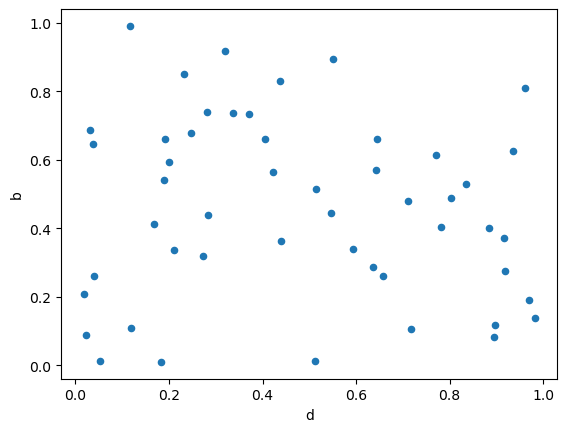

In [53]:
example = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"]) # populate 50*4 array with random samples from a uniform distribution over [0, 1)
print(example.head())
example.plot.scatter(x="d", y="b")  # We can call a scatter function from the dataframe!
plt.show()

### Exercise
1. Plot the dependency of body mass index (bmi) from the age using scatter plot. Do you see any trend in the data?
2. Now try to plot the average dependency between age and the bmi. For this:
  - Create a dataframe `aggr_by_age` that groups the patients based on their age and aggregates the column `bmi` using the mean. Hint: Have a look at the previous exercise if you don't remember the functions.
  - Print the dataframe `aggr_by_age`. There is only one column `bmi`, right? The other column `age` is actually the index and not a true column in the dataframe. Use the function `reset_index()` to make `age` a proper column as well.
  - Plot the dependency between age and the average `bmi` value in that age group.


You'll see some suspicious outliers, that distract us from looking closer at the main part of the graph. We don't want to modify the data in the dataframe, but rather restrict the visible area of the graph.
3. Use `plt.xlim(min value, max value)` and `plt.ylim(min value, max value)` to get a scatter plot without the outliers.

<Axes: xlabel='age', ylabel='bmi'>

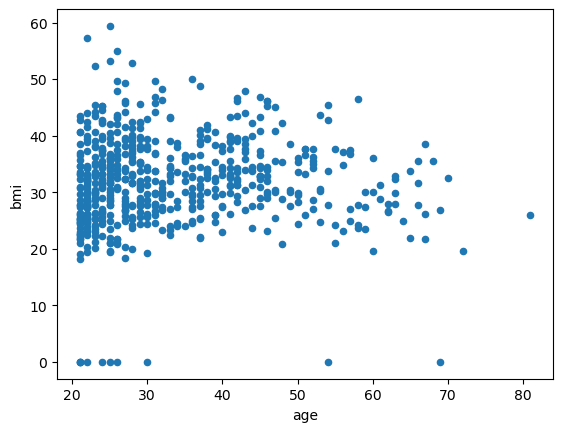

In [55]:
# 1
df.plot.scatter(x='age', y='bmi')

           bmi
age           
21   26.876087
22   29.851786
23   31.716667
24   32.988889
25   31.528205
26   34.011538
27   33.019231
28   33.888462
29   33.880000
30   29.276471
31   34.142105
32   31.833333
33   32.633333
34   30.671429
35   32.442857
36   31.407692
37   32.552941
38   35.772727
39   31.500000
40   31.622222
41   34.893750
42   35.930769
43   37.160000
44   33.257143
45   34.960000
46   34.772727
47   34.566667
48   31.800000
49   31.625000
50   31.000000
51   34.220000
52   33.500000
53   32.300000
54   29.920000
55   27.666667
56   31.700000
57   31.575000
58   30.525000
59   26.966667
60   28.566667
61   30.000000
62   27.033333
63   30.775000
64   25.000000
65   27.800000
66   31.633333
67   28.766667
68   35.600000
69   13.400000
70   32.500000
72   19.600000
81   25.900000
    age        bmi
0    21  26.876087
1    22  29.851786
2    23  31.716667
3    24  32.988889
4    25  31.528205
5    26  34.011538
6    27  33.019231
7    28  33.888462
8    29  33.880000


<Axes: xlabel='age', ylabel='bmi'>

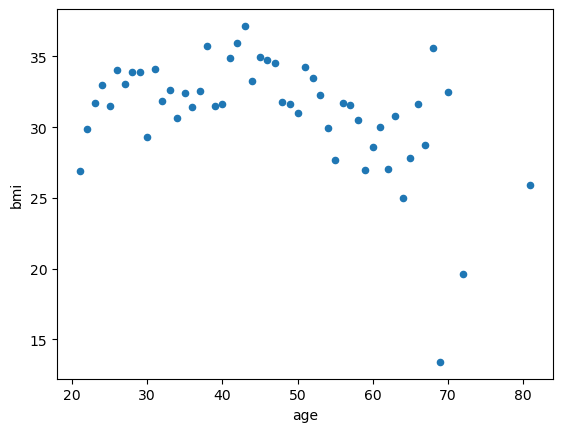

In [59]:
# 2
aggr_by_age = df.groupby('age').agg({'bmi': 'mean'})
print(aggr_by_age)
aggr_by_age = aggr_by_age.reset_index()
print(aggr_by_age)
aggr_by_age.plot.scatter(x='age', y='bmi')

(22.0, 37.0)

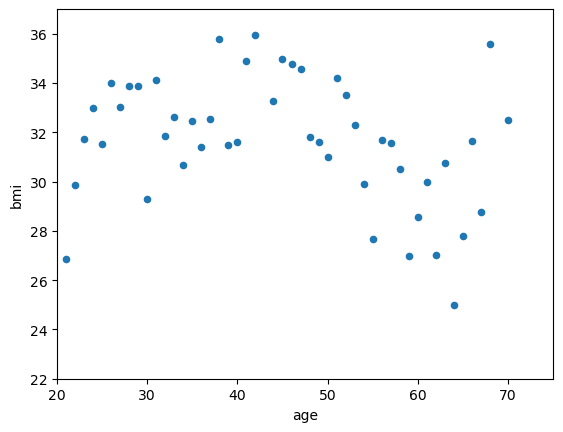

In [11]:
# 3
aggr_by_age.plot.scatter(x='age', y='bmi')
plt.xlim(20, 75)
plt.ylim(22, 37)

## Histograms and density plots
A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

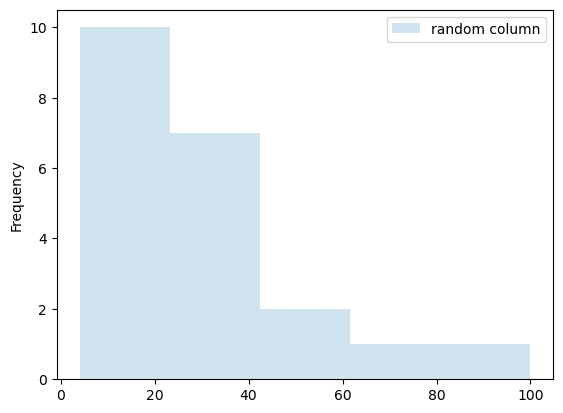

In [65]:
example = pd.DataFrame([21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100], columns=["random column"])
example.plot.hist(bins=5, alpha=0.2)
plt.show()

### Exercise

1. Try to change the `num_bins` parameters and see how the plot changes.
2. Change the parameter `alpha` and see how the plot changes.

<Axes: ylabel='Frequency'>

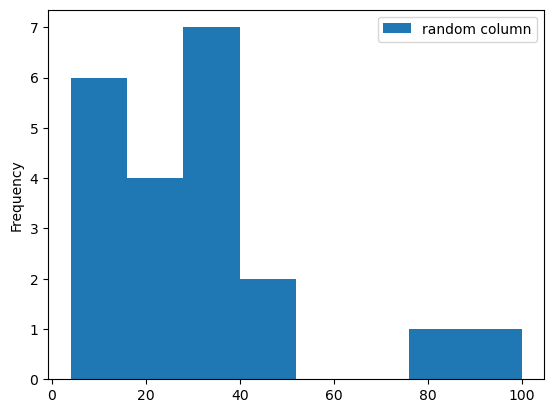

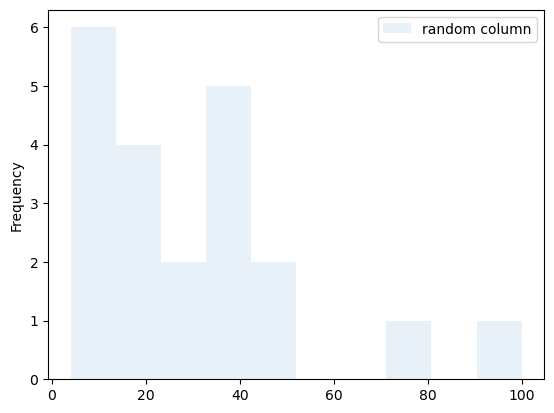

In [67]:
# 1
example.plot.hist(bins=8)

# 2
example.plot.hist(alpha=0.1)

Density plots are similar to histograms in the sense that they also help us visualize the distrubution of a variable. An advantage that density plots have over histograms is that they're better at determining the distribution shape because they're not affected by the number of bins used, so that we have a smooth curve. We can create density plots straight out of a dataframe as follows.

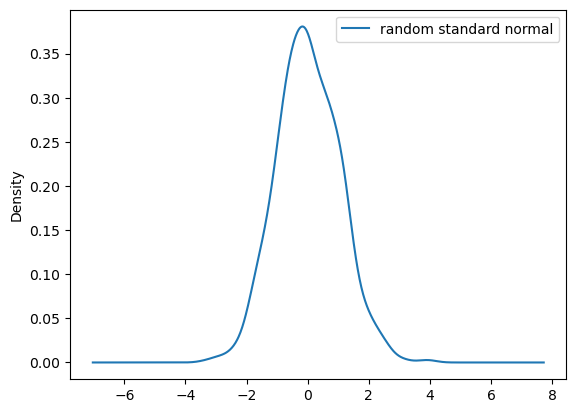

In [72]:
example1 = pd.DataFrame(np.random.randn(1000), columns=["random standard normal"]) # we create an array with 1000 points from the “standard normal” distribution.
example1.plot.kde()
plt.show()

### Exercise
1. Plot the age distribution of all observed patients using both histogram and density plot
2. Now let's look what age groups mostly suffer from diabetes (hint: create new dataframes `df_disease` and `df_no_disease` by applying a filter on the column "diabetes". Use copy to not only have a view on them but have new dataframes.)
3. Plot the densities for both non-diabetics and diabetics in the same plot. Use the parameter `label="diabetic"` and `label="non diabetic"` when calling the kde function from pandas. Also call `plt.legend()` before showing the plot to print the labels.

<Axes: ylabel='Frequency'>

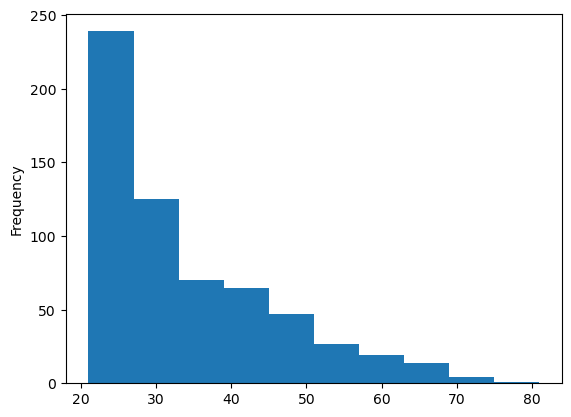

In [69]:
# 1
df['age'].plot.hist()

<Axes: ylabel='Density'>

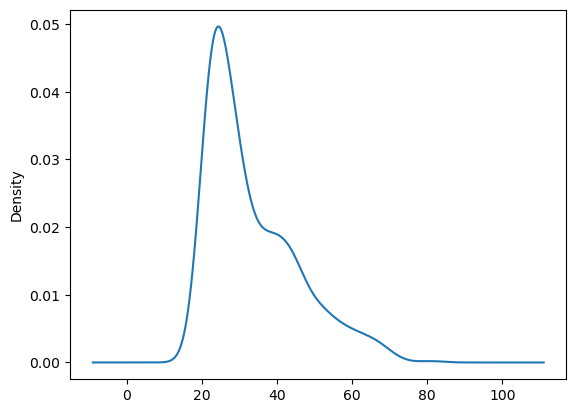

In [74]:
df['age'].plot.kde()

In [27]:
# 2
df_disease = df[df['diabetes'] == 1].copy()
df_no_disease = df[df['diabetes'] == 0].copy()

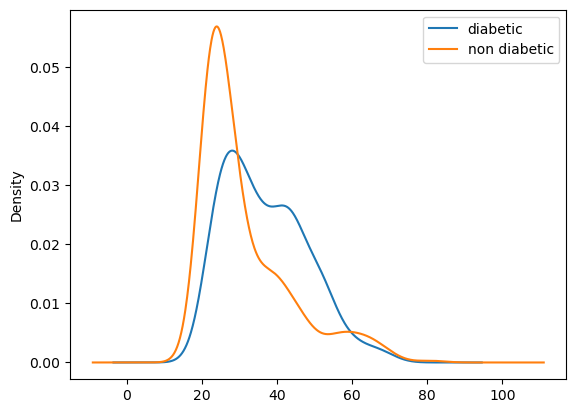

In [28]:
# 3
df_disease['age'].plot.kde(label='diabetic')
df_no_disease['age'].plot.kde(label='non diabetic')
plt.legend()

## Pie plots

Important: Pie plots can sometimes be missleading as the human eye is not very good at interpreting angles. Nevertheless, pie plots are a common way of illustrating data outside of academia. So it is nice to know how to create pie plots, but use them carefully!

A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. You can create a pie plot with `DataFrame.plot.pie()`. If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

         mass  radius
Mercury  0.33  2439.7
Venus    4.87  6051.8
Earth    5.97  6378.1


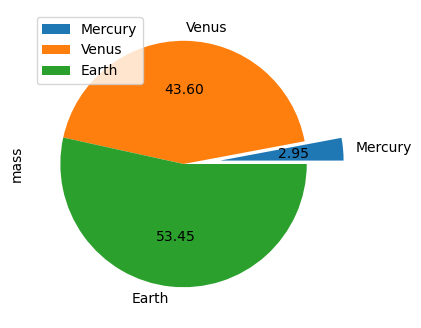

In [37]:
example2 = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
print(example2)
my_explode = [0.3,0,0] # pass an array to "explode" parameter to distinguish some slices from the whole pie
example2.plot.pie(y='mass', autopct="%.2f", figsize=(4,4), explode = my_explode) # with figsize you can resize your pie plot
#example2.plot.bar(y='mass', figsize=(4,4)) # with figsize you can resize your pie plot
plt.show()

If you want to see the visualization of different columns in the same dataframe at the same time, use (subplots = True):

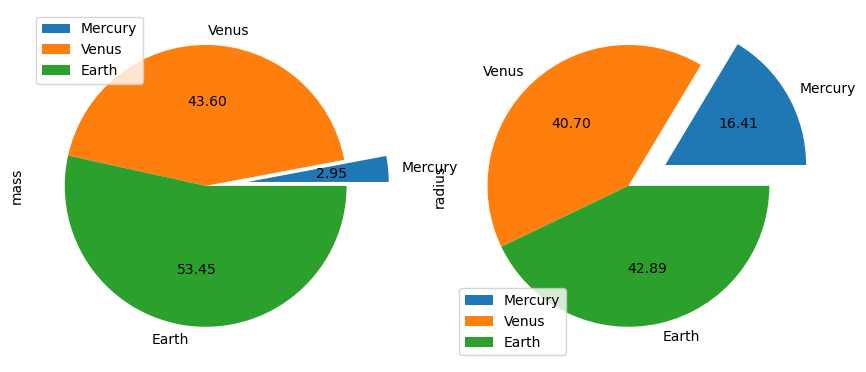

In [35]:
example2.plot.pie(subplots = True, autopct="%.2f", figsize=(10,10), explode = my_explode) # with figsize you can resize your pie plot
# autopct labels the wedges with their numeric value
plt.show()

### Exercise

Analyse the number of pregnancies in terms of bins for patients with diabetes. Therefore,
1. Create a new column 'no_times_pregnant_bin' which contains one of the strings 'no pregnancies', '1-3 pregnancies', ..., '7-9 pregnancies' (hint: Use `map` to apply the function `count_preg` on the column `no_times_pregnant`). A first version of the function is described below.
2. Group the diseased people by 'no_times_pregnant_bin' and count the number of people in each of these groups (hint: use aggregations again). The result should look similar to the image below.
3. Plot the grouped dataframe using a pie chart.
4. Repeat the previous steps using the dataframe `df_non_disease`. What do you see? Do you have any ideas about the effect of pregnancies on the likelihood of developing diabetes? Use google to comfirm your ideas.

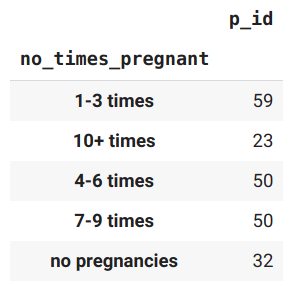

In [29]:
# 1
def count_preg(no_times_pregnant):
  if no_times_pregnant >= 10:
    return '10+ times'
  elif no_times_pregnant >= 7:
    return '7-9 times'
  elif no_times_pregnant >= 5:
    return '5-7 times'
  elif no_times_pregnant >= 3:
    return '3-5 times'
  elif no_times_pregnant >= 1:
    return '1-3 times'
  else:
    return 'no pregnancies'

df['no_times_pregnant_bin'] = df['no_times_pregnant'].map(count_preg)

In [31]:
# 2
df_grouped = df.groupby('no_times_pregnant_bin').agg({'p_id': 'count'})

<Axes: ylabel='p_id'>

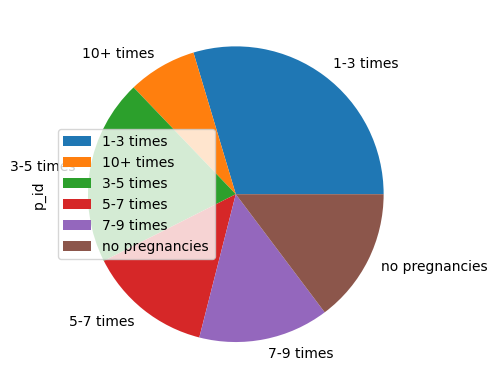

In [33]:
# 3
df_grouped.plot.pie(y='p_id')

<Axes: ylabel='p_id'>

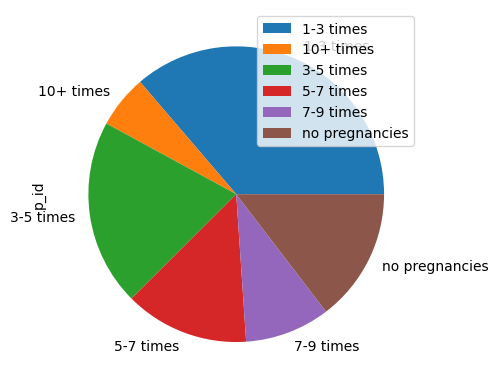

In [160]:
# 4
df_no_disease['no_times_pregnant_bin'] = df_no_disease['no_times_pregnant'].map(count_preg)
df_no_disease_grouped = df_no_disease.groupby('no_times_pregnant_bin').agg({'p_id': 'count'})
df_no_disease_grouped.plot.pie(y='p_id')

## Boxplots

A boxplot is a very common style of illustrating data. It is a standardized way of displaying the distribution of data based on five summary statistics (minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It immediately shows outliers along with the values. It can also tell if the data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

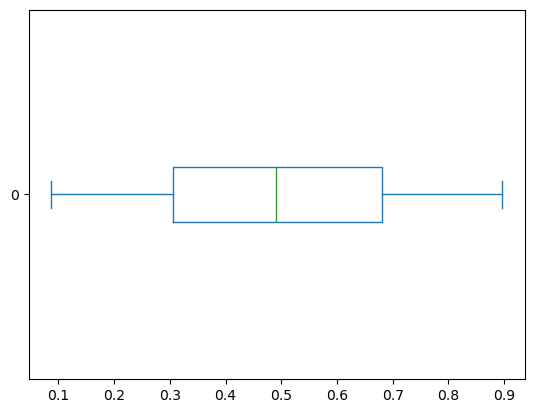

In [31]:
example3 = pd.DataFrame(np.random.rand(10))
example3.plot.box(vert = False) # by default a vertical boxplot is drawn, if you want horizontal, set vert to False
plt.show()

### Exercise

Have a look at the distributions of serum insulin and glucose levels of the patients with diabetes and without diabetes using boxplots. Use a horizontal boxplot for serum insulin and a vertical boxplot for the glucose levels. Can you see a difference? Can you spot the 5 number summary?

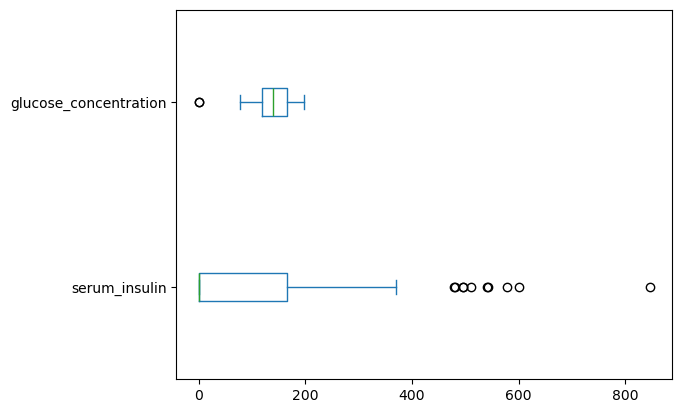

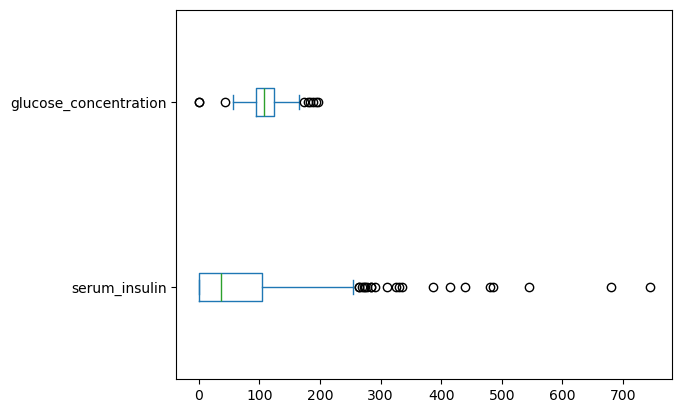

In [32]:
# option 1
df_disease[['serum_insulin', 'glucose_concentration']].plot.box(vert = False)
plt.show()
df_no_disease[['serum_insulin', 'glucose_concentration']].plot.box(vert = False)
plt.show()

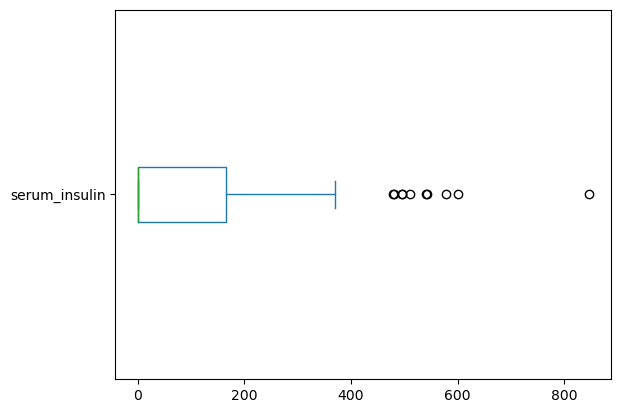

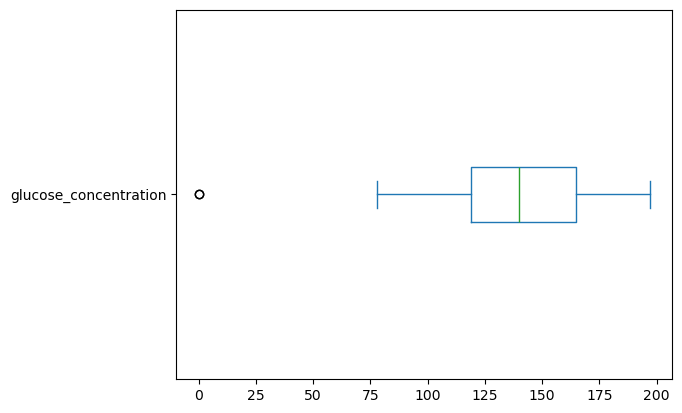

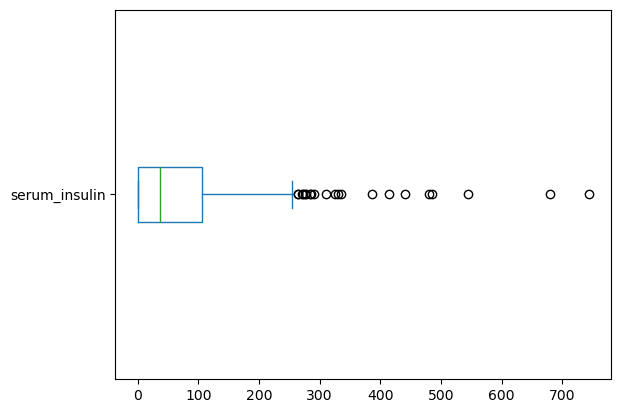

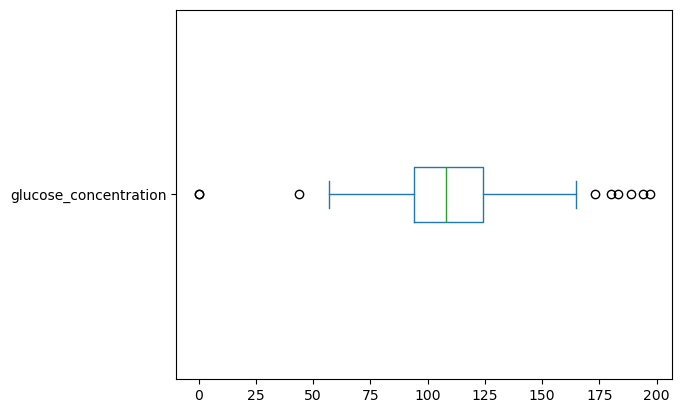

In [33]:
# option 2
df_disease['serum_insulin'].plot.box(vert = False)
plt.show()
df_disease['glucose_concentration'].plot.box(vert = False)
plt.show()
df_no_disease['serum_insulin'].plot.box(vert = False)
plt.show()
df_no_disease['glucose_concentration'].plot.box(vert = False)
plt.show()